In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
data_dir = '/home/salman/.keras/datasets/horse_or_human'

In [3]:
valid_size = .2

In [4]:
# Normalize the test and train sets with torchvision
train_transforms = transforms.Compose([transforms.Resize(224),
                                           transforms.ToTensor(),
                                           ])

test_transforms = transforms.Compose([transforms.Resize(224),
                                          transforms.ToTensor(),
                                          ])

In [5]:
# ImageFolder class to load the train and test images
train_data = datasets.ImageFolder(data_dir, transform=train_transforms)
test_data = datasets.ImageFolder(data_dir, transform=test_transforms)

In [6]:
# Number of train images
num_train = len(train_data)
indices = list(range(num_train))

In [7]:
train_data.classes

['horses', 'humans']

In [8]:
# Split = 20% of train images
split = int(np.floor(valid_size * num_train))
# Shuffle indices of train images
np.random.shuffle(indices)

In [9]:
split

205

In [10]:
num_train

1027

In [11]:
# Subset indices for test and train
train_idx, test_idx = indices[split:], indices[:split]

In [12]:
len(train_idx)
len(test_idx)

205

In [13]:
# Samples elements randomly from a given list of indices
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

In [14]:
# Batch and load the images
trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=10)
testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=10)

In [15]:
print(trainloader.dataset.classes)

['horses', 'humans']


In [16]:
examples = iter(trainloader)
samples ,labels = next(examples)
samples.shape

torch.Size([10, 3, 224, 224])

In [17]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

In [18]:
out = torchvision.utils.make_grid(samples)

In [19]:
class_names = train_data.classes

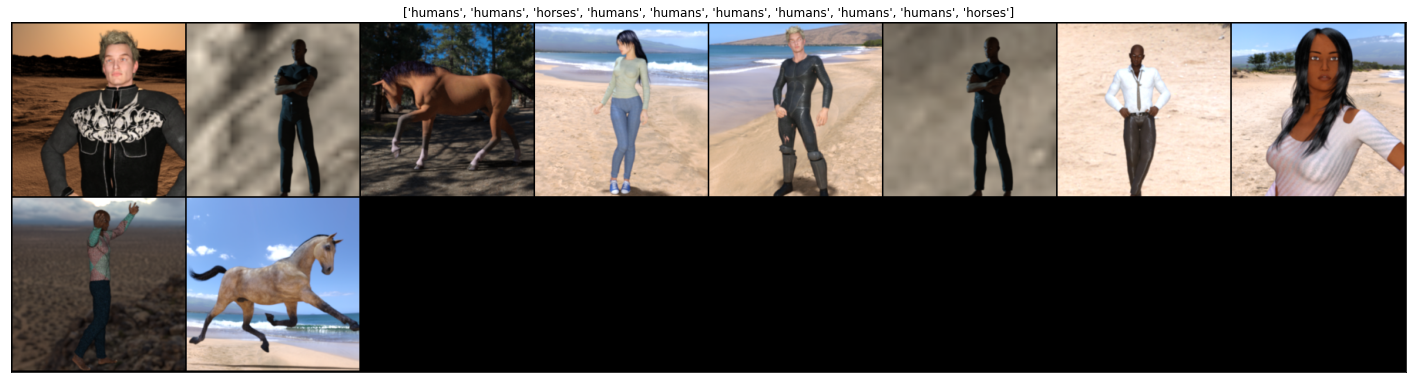

In [20]:
imshow(out,title=[class_names[x] for x in labels])

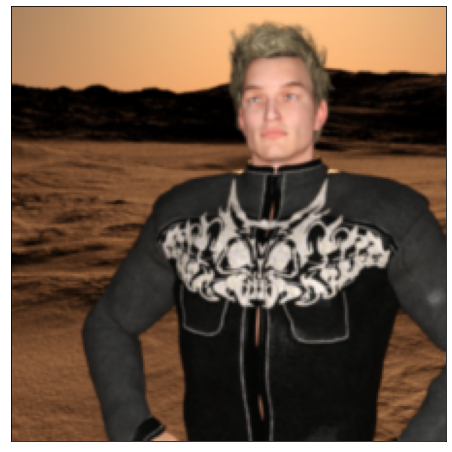

In [21]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.title(title)
    plt.show()
imshow(samples[0])

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
model = models.resnet18(pretrained=True)

/home/salman/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/salman/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
#Freeze all params
for params in model.parameters():
    params.requires_grad_ = False

In [25]:
#add a new final layer
nr_filters = model.fc.in_features  #number of input features of last layer
model.fc = nn.Sequential(nn.Linear(nr_filters,512),
                        nn.ReLU(),
                        nn.Dropout(0.5),
                        nn.Linear(512,2))

In [26]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [28]:
#Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        #labels = labels.unsqueeze(1).float()
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (epoch+1) % 1 == 0:    # 
            print(f'epoch:{epoch+1},loss={running_loss}')
            running_loss = 0.0

print('Finished Training')

epoch:1,loss=0.7278604507446289
epoch:1,loss=1.480697512626648
epoch:1,loss=0.523010790348053
epoch:1,loss=0.974484920501709
epoch:1,loss=0.960671067237854
epoch:1,loss=0.21585538983345032
epoch:1,loss=1.9788827896118164
epoch:1,loss=0.1034087985754013
epoch:1,loss=0.33539074659347534
epoch:1,loss=0.3529277443885803
epoch:1,loss=0.07762420922517776
epoch:1,loss=1.1622310876846313
epoch:1,loss=0.055001504719257355
epoch:1,loss=0.015228000469505787
epoch:1,loss=0.25002604722976685
epoch:1,loss=0.2962481379508972
epoch:1,loss=0.0023489135783165693
epoch:1,loss=0.014080977067351341
epoch:1,loss=0.994184136390686
epoch:1,loss=0.006297088228166103
epoch:1,loss=0.061850786209106445
epoch:1,loss=0.0016342668095603585
epoch:1,loss=0.3754068911075592
epoch:1,loss=0.0948103815317154
epoch:1,loss=0.5102529525756836
epoch:1,loss=1.3281598091125488
epoch:1,loss=0.0012278805952519178
epoch:1,loss=0.2920073866844177
epoch:1,loss=0.0020242570899426937
epoch:1,loss=0.050988711416721344
epoch:1,loss=0.05

In [29]:
test = samples[4].view(1,3,224,224)

In [30]:
test = test.to(device)

In [31]:
model(test)

tensor([[0.3953, 1.5001]], grad_fn=<AddmmBackward0>)

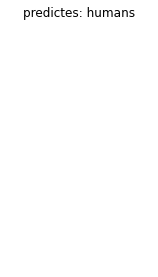

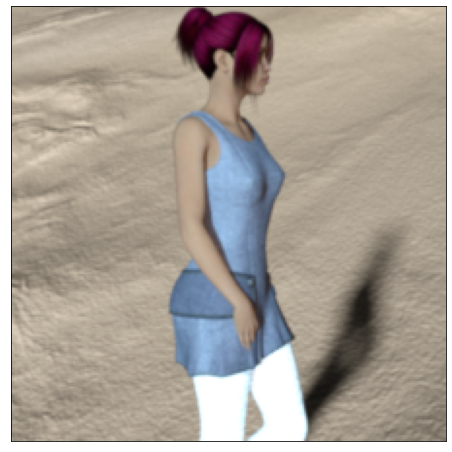

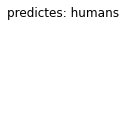

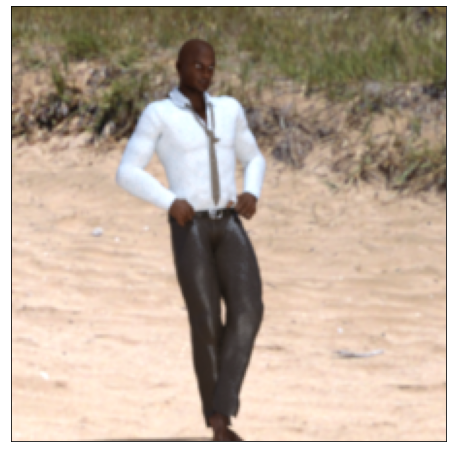

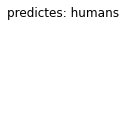

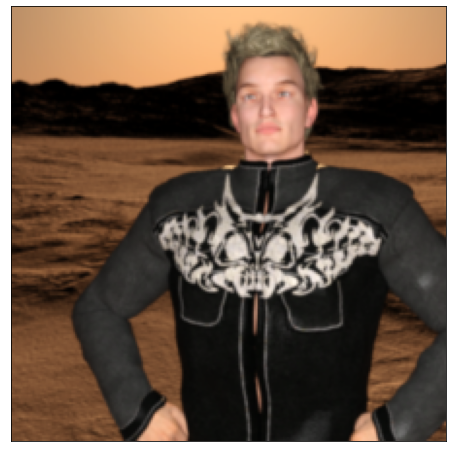

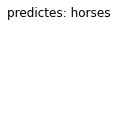

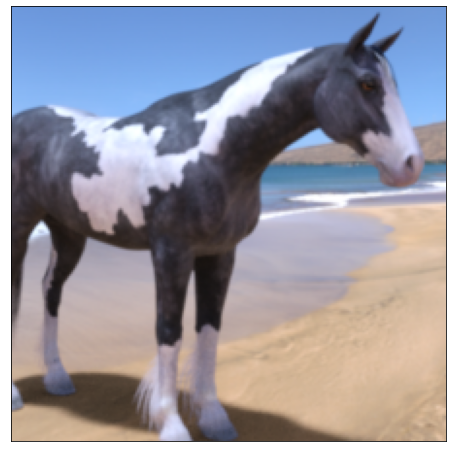

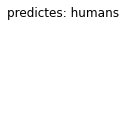

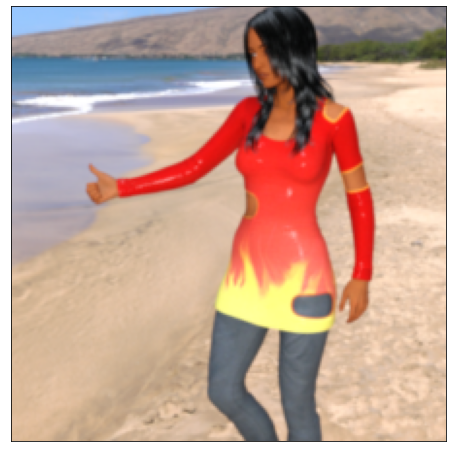

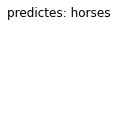

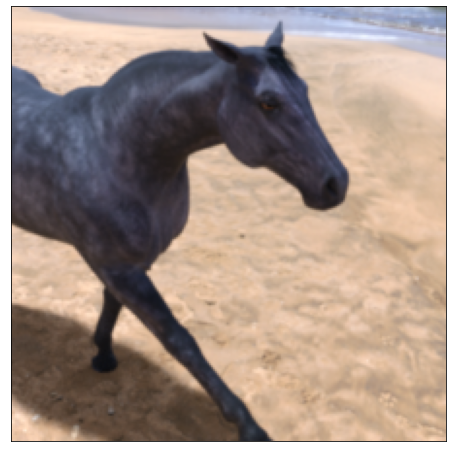

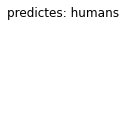

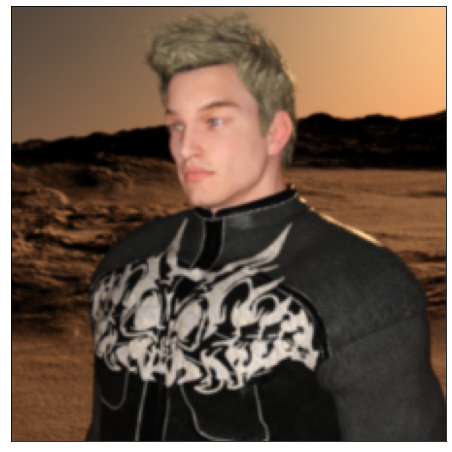

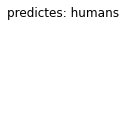

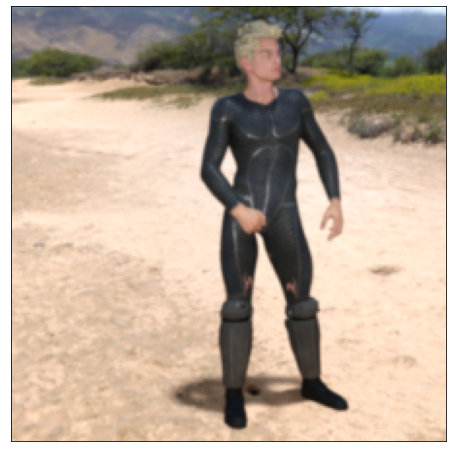

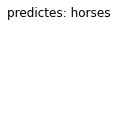

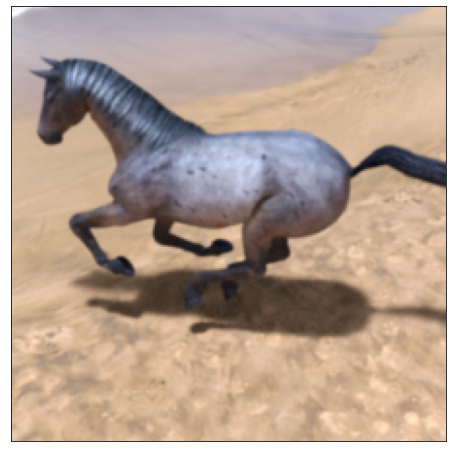

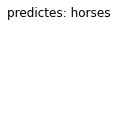

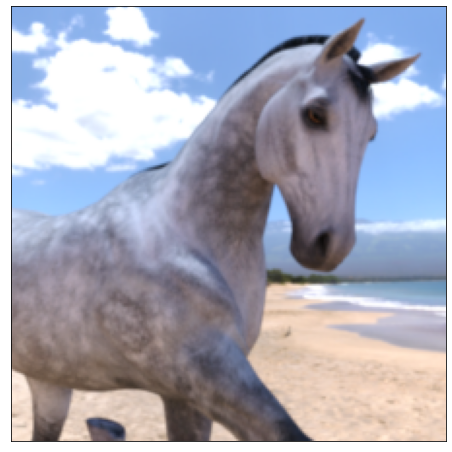

In [32]:
def visualize_model(model, num_images=10):
    images_so_far = 0
    fig = plt.figure(figsize=(15, 10))
    
    for i, data in enumerate(testloader):
        inputs, labels = data
        #if use_cuda:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        #print(outputs.round())
        preds = torch.max(outputs,dim=1)[1]
        preds = preds.cpu()
        preds = preds.numpy()
        #print(preds)
        #print(preds[1].item())
        #print(int(preds[0]))
        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(2, num_images//2, images_so_far)
            ax.axis('off')
            ax.set_title('predictes: {}'.format(test_data.classes[int(preds[j])]))
            #print(inputs[0].shape)
            mpimg = inputs[j].cpu()
            imshow(mpimg)
            
            if images_so_far == num_images:
                return 

plt.ion()
visualize_model(model)
plt.ioff()